# Pymaceuticals Inc.
---

### Analysis

Based on the data analysis and visualizations, it is evident that Capomulin and Ramicane are the most effective treatments with the least amount of variance in tumor volume, standard deviation, and standard error compared to the other eight drugs.

Additionally, Capomulin and Ramicane have the highest number of observed mouse timepoints, indicating that these drugs provide a more accurate assessment of their effectiveness.

The box plot visualization further confirms that Capomulin and Ramicane are the top contenders for reducing tumor volume compared to the other drugs.

A line graph was used to observe the treatment of mouse I509 with Capomulin, showing a semi-consistent decrease in tumor volume over the course of 35 days of treatment.

Additionally, the correlation coefficient and linear regression analysis revealed a strong positive correlation (correlation coefficient = 0.84) between the mouse's weight and tumor volume. This suggests that as the weight of the mouse increases, the tumor volume tends to increase as well.

In conclusion, Capomulin and Ramicane stand out as the most effective treatments for reducing tumor volume, and they also provide a substantial number of mouse observations, making them reliable choices for further investigation. The correlation between mouse weight and tumor volume is significant, which highlights the importance of considering the mouse's weight when analyzing treatment outcomes.

 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'inner')

# Display the data table for preview
merged_df.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
total_mice = merged_df['Mouse ID'].nunique()
total_mice

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
dupe_mice_id = dupe_mice['Mouse ID'].unique()
dupe_mice_id

array(['g989'], dtype=object)

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_merged_df = merged_df[~merged_df['Mouse ID'].isin(dupe_mice_id)]
new_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = new_merged_df['Mouse ID'].nunique()
new_total_mice

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_volume = new_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_volume = new_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_volume = new_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_volume = new_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_volume = new_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.
tumor_volume_dictionary = {'Mean Tumor Volume':mean_volume,
                          'Median Tumor Volume': median_volume,
                          'Tumor Volume Variance': variance_volume,
                          'Tumor Volume Std. Dev.': std_dev_volume,
                          'Tumor Volume Std. Err.': sem_volume}
tumor_volume_summary = pd.DataFrame(tumor_volume_dictionary)
tumor_volume_summary                         

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats = new_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean = 'mean', median = 'median', var = 'var', std = 'std', sem = lambda x: x.sem()) 
tumor_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

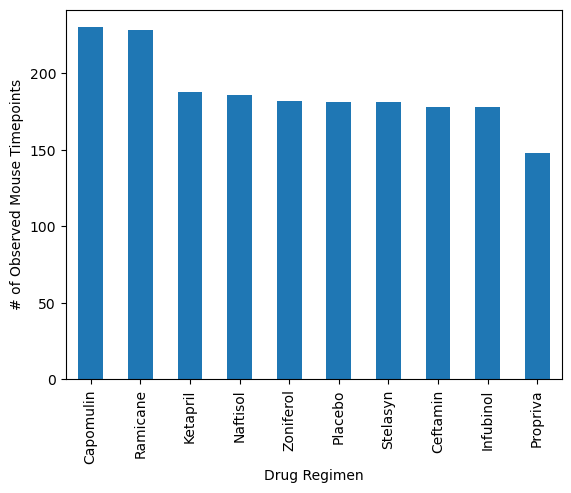

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_regimen = new_merged_df.groupby('Drug Regimen')['Timepoint'].count()
sorted_count_regimen = count_regimen.sort_values(ascending = False)
sorted_count_regimen.plot(kind = 'bar', xlabel = 'Drug Regimen', ylabel='# of Observed Mouse Timepoints')

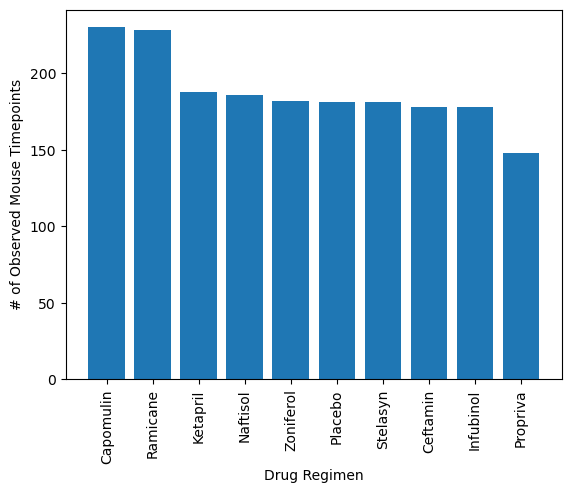

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_regimen2 = new_merged_df.groupby('Drug Regimen')['Timepoint'].count()
sorted_count_regimen2 = count_regimen2.sort_values(ascending = False)
plt.bar(sorted_count_regimen2.index, sorted_count_regimen2.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

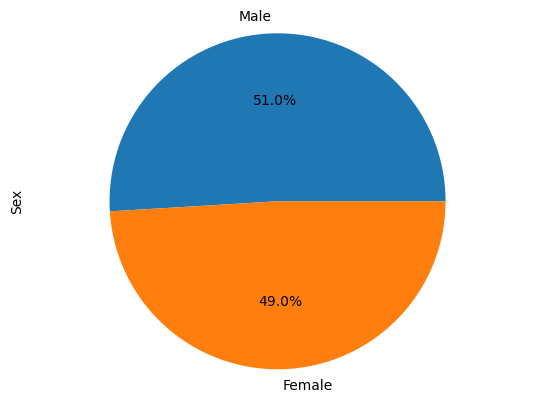

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = new_merged_df['Sex'].value_counts()
sex_count.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

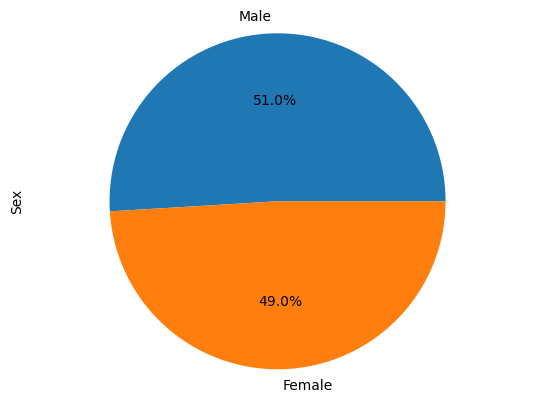

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count2 = new_merged_df['Sex'].value_counts()
plt.pie(sex_count2, labels = sex_count2.index, autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = new_merged_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df1 = max_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tumor_volume_df = pd.merge(max_timepoint_df1, new_merged_df, on = ['Mouse ID', 'Timepoint'], how = 'left')
max_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
#Capomulin, Ramicane, Infubinol, and Ceftamin
treatments_x = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_y = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_x:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = max_tumor_volume_df[max_tumor_volume_df['Drug Regimen'] == drug]
    
    # add subset 
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    tumor_vol_data_y.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    q1 = tumor_volumes.quantile(0.25)
    q3 = tumor_volumes.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{drug}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


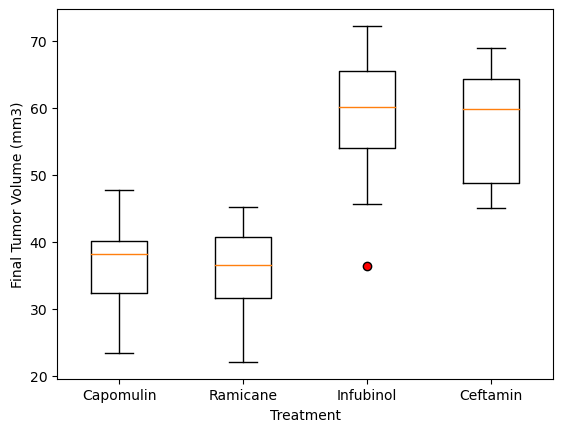

In [81]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data_y, labels=treatments_x, flierprops=dict(markerfacecolor='red'))

plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

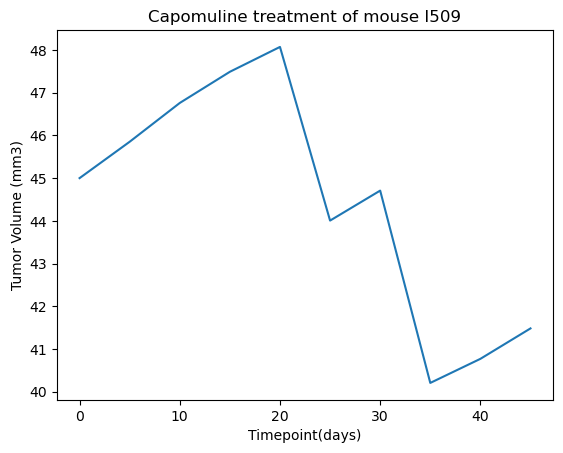

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomuline_filter = new_merged_df.loc[new_merged_df['Drug Regimen']== 'Capomulin']
capomuline_filter = capomuline_filter.reset_index()
mousel509_filter = capomuline_filter[capomuline_filter['Mouse ID']== 'l509']
timepoint_x = mousel509_filter['Timepoint']
tumor_volume_y = mouseI509_filter['Tumor Volume (mm3)']

plt.plot(timepoint_x, tumor_volume_y)

plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomuline treatment of mouse I509')
plt.show

C:\Users\jolyc\AppData\Local\Temp\ipykernel_5104\115756747.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_tumor_volume = capomuline_filter.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()


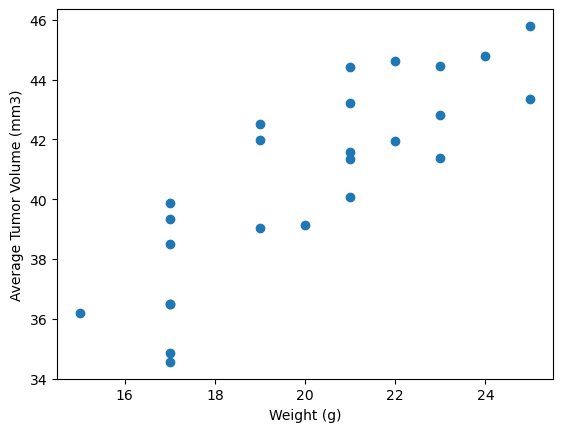

In [74]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomuline_filter.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()

weight_x = avg_tumor_volume['Weight (g)']
avg_tumor_volume_y = avg_tumor_volume['Tumor Volume (mm3)']

plt.scatter(weight_x, avg_tumor_volume_y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

C:\Users\jolyc\AppData\Local\Temp\ipykernel_5104\4154301897.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_tumor_volume = capomuline_filter.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The correlation between mouse weight and the average tumor volume is 0.84


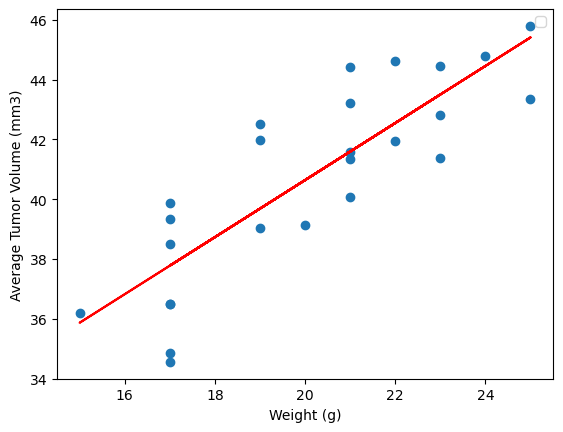

In [87]:
avg_tumor_volume = capomuline_filter.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()

weight_x = avg_tumor_volume['Weight (g)']
avg_tumor_volume_y = avg_tumor_volume['Tumor Volume (mm3)']

plt.scatter(weight_x, avg_tumor_volume_y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = linregress(weight_x, avg_tumor_volume_y)
plt.plot(weight_x, slope * weight_x + intercept, color='red')
print(f"The correlation between mouse weight and the average tumor volume is {r_value:.2f}")
plt.legend()
plt.show()